In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [2]:
train = pd.read_csv('train_users_2.csv')
test = pd.read_csv('test_users.csv')
session =  pd.read_csv("sessions.csv")

In [3]:
train

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [4]:
test

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
62092,zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
62093,fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox
62094,87k0fy4ugm,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari


In [5]:
session

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [6]:
(train.shape[0] - train.count())/train.shape[0]

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

In [7]:
(test.shape[0] - test.count())/test.shape[0]

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         1.000000
gender                     0.000000
age                        0.465022
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.000322
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
dtype: float64

In [8]:
(session.shape[0] - session.count())/session.shape[0]

user_id          0.003264
action           0.007535
action_type      0.106570
action_detail    0.106570
device_type      0.000000
secs_elapsed     0.012872
dtype: float64

In [9]:
def countplot(feature,data=train):
    plt.figure(figsize=(15, 10))
    g = sns.countplot(data[feature],)
    for item in g.get_xticklabels():
        item.set_rotation(90)
        pass
    plt.show()
    pass

In [10]:
# split timestamp into year, month and day
train['timestamp_year'] = train['timestamp_first_active'].astype(str).apply(lambda x: x[:4])
test['timestamp_year'] = test['timestamp_first_active'].astype(str).apply(lambda x: x[:4])

train['timestamp_month'] = train['timestamp_first_active'].astype(str).apply(lambda x: x[4:6])
test['timestamp_month'] = test['timestamp_first_active'].astype(str).apply(lambda x: x[4:6])

train['timestamp_day'] = train['timestamp_first_active'].astype(str).apply(lambda x: x[6:8])
test['timestamp_day'] = test['timestamp_first_active'].astype(str).apply(lambda x: x[6:8])


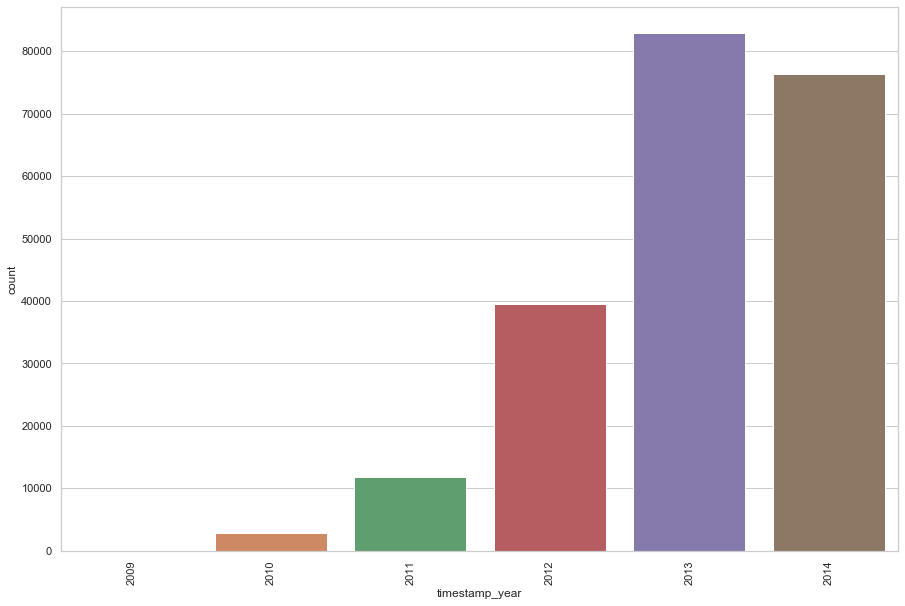

In [11]:
countplot('timestamp_year')

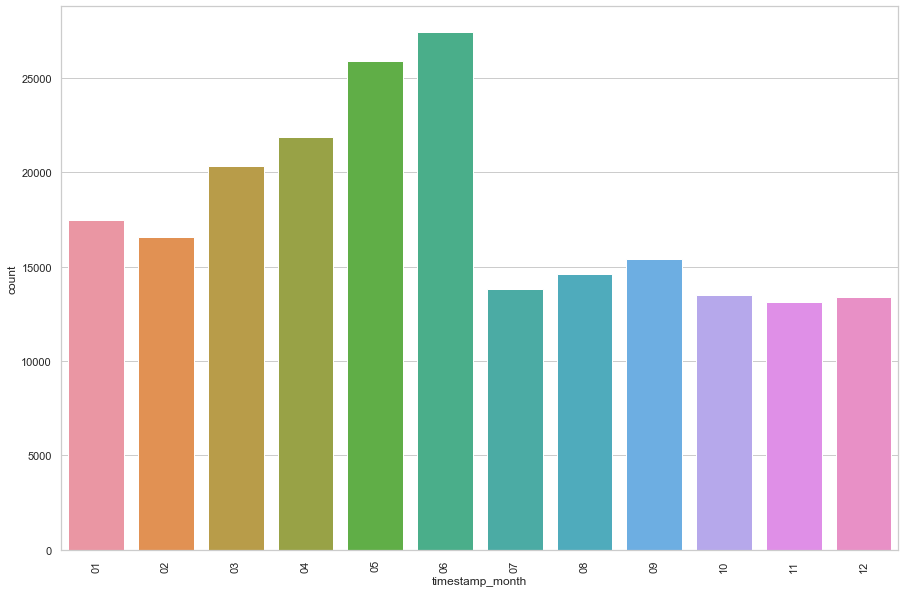

In [12]:
countplot('timestamp_month')

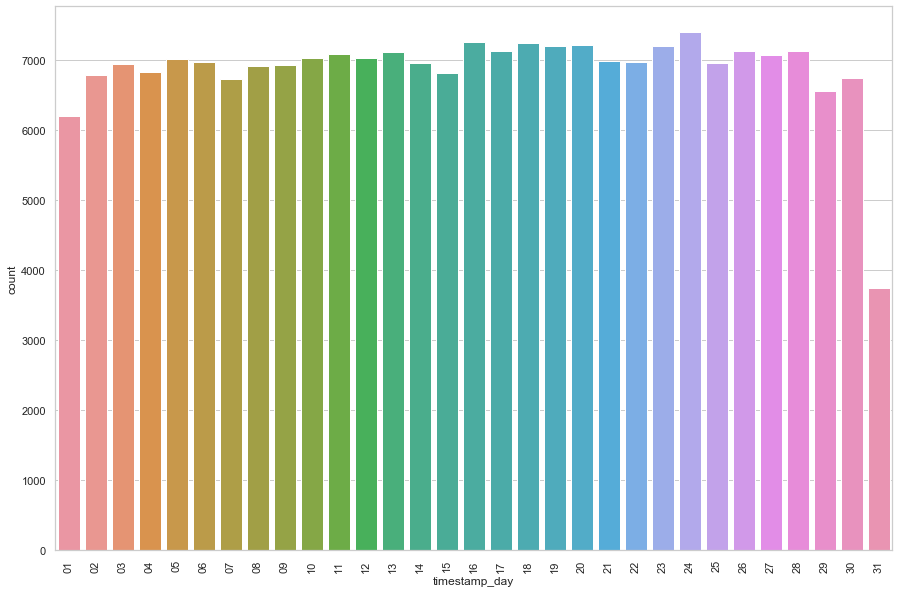

In [13]:
countplot('timestamp_day')

In [14]:
# split date_account_created into year, month and day
train['date_account_created_year'] = train['date_account_created'].apply(lambda x: x.split('-')[0]).astype('int')
test['date_account_created_year'] = test['date_account_created'].apply(lambda x: x.split('-')[0]).astype('int')

train['date_account_created_month'] = train['date_account_created'].apply(lambda x: x.split('-')[1]).astype('int')
test['date_account_created_month'] = test['date_account_created'].apply(lambda x: x.split('-')[1]).astype('int')

train['date_account_created_day'] = train['date_account_created'].apply(lambda x: x.split('-')[2]).astype('int')
test['date_account_created_day'] = test['date_account_created'].apply(lambda x: x.split('-')[2]).astype('int')

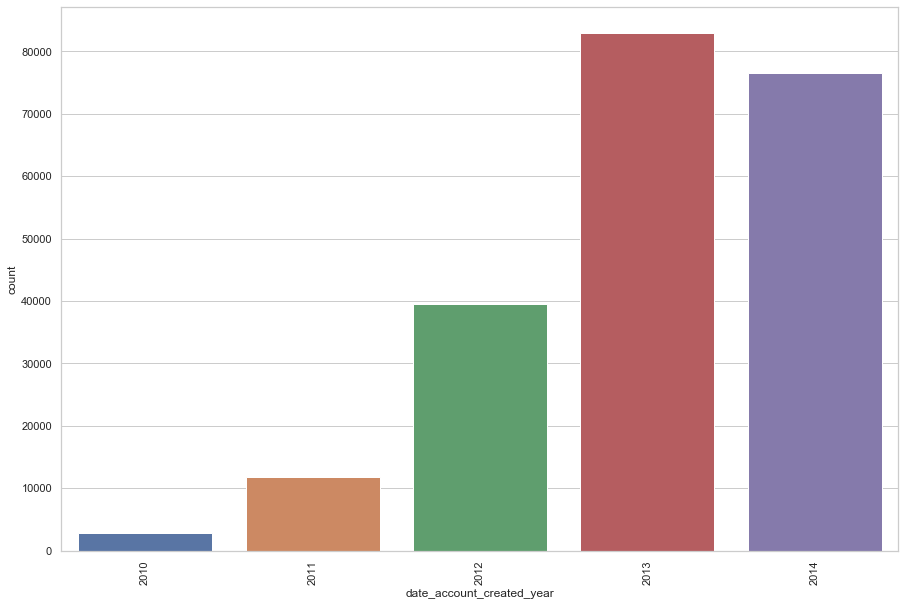

In [15]:
countplot('date_account_created_year')

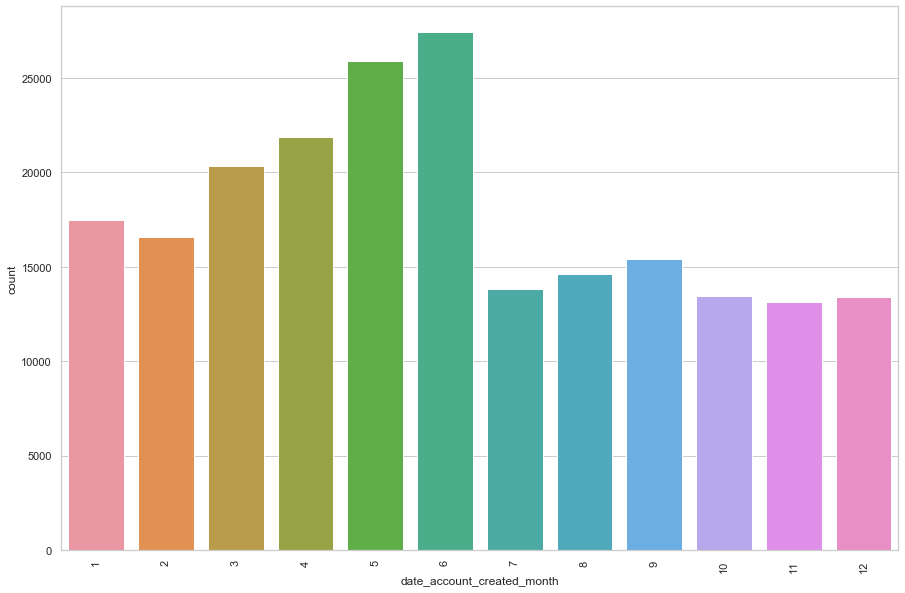

In [16]:
countplot('date_account_created_month')

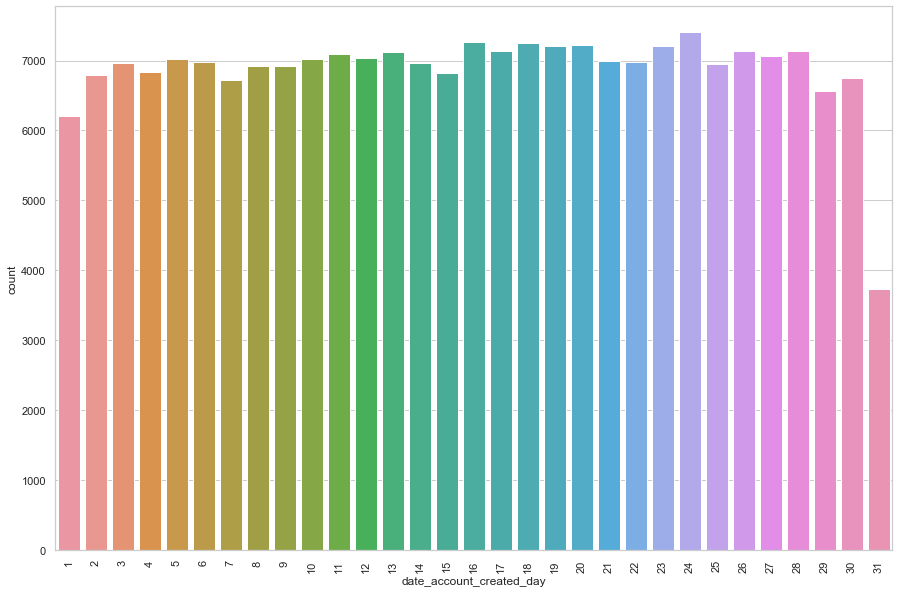

In [17]:
countplot('date_account_created_day')

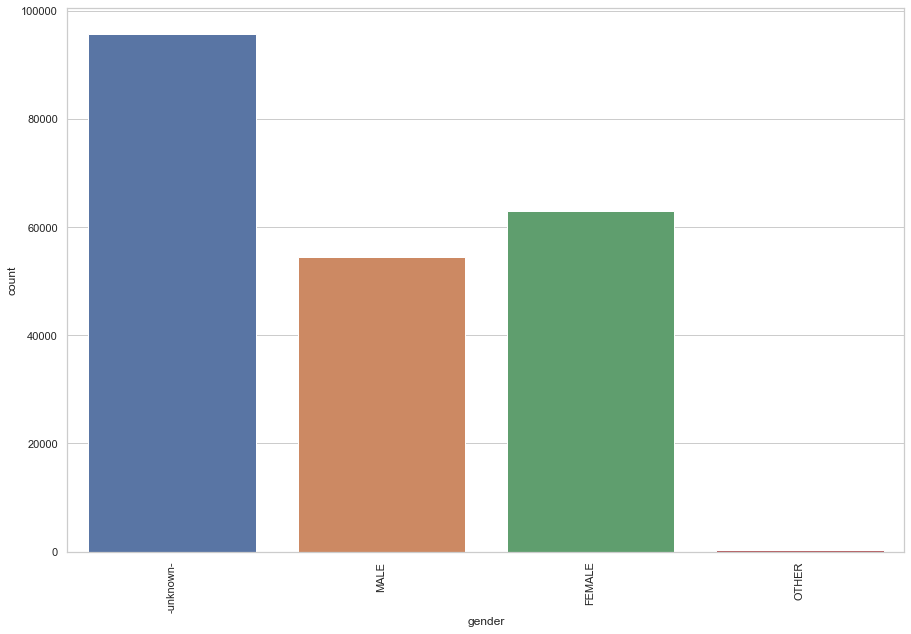

In [18]:
countplot('gender')

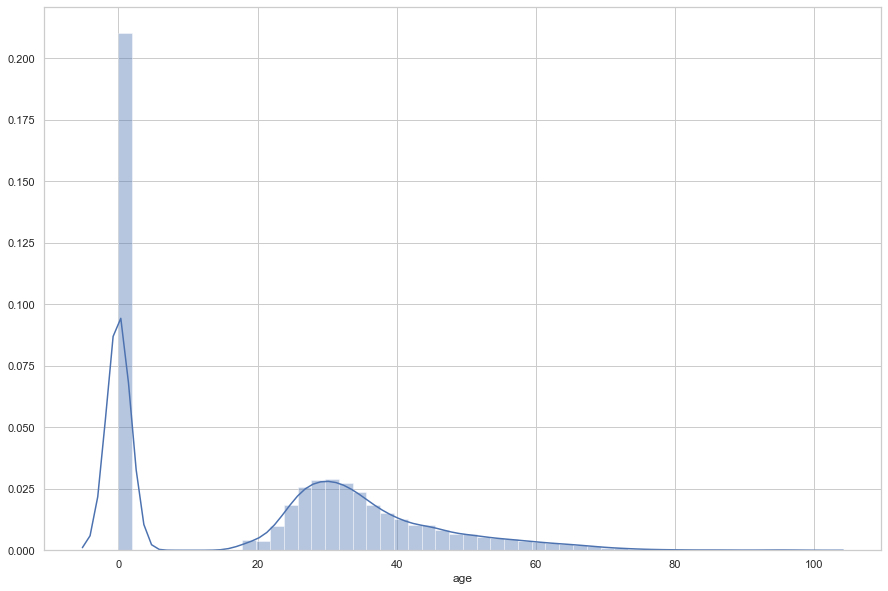

In [19]:
train['age'] = train['age'].fillna(0).astype(int)
plt.figure(figsize=(15, 10))
sns.distplot(train[train['age']<100]['age'])
plt.show()

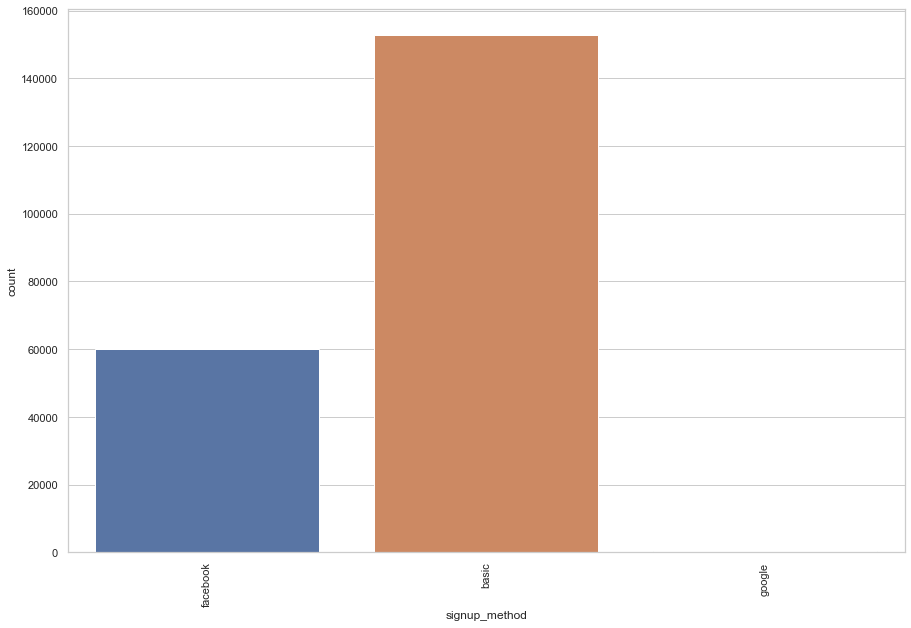

In [20]:
countplot('signup_method')

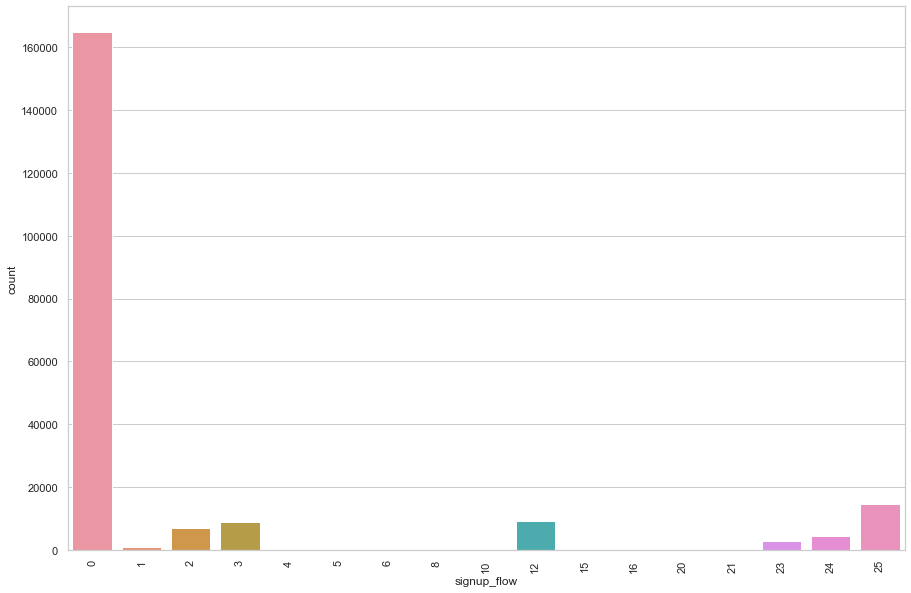

In [21]:
countplot('signup_flow')

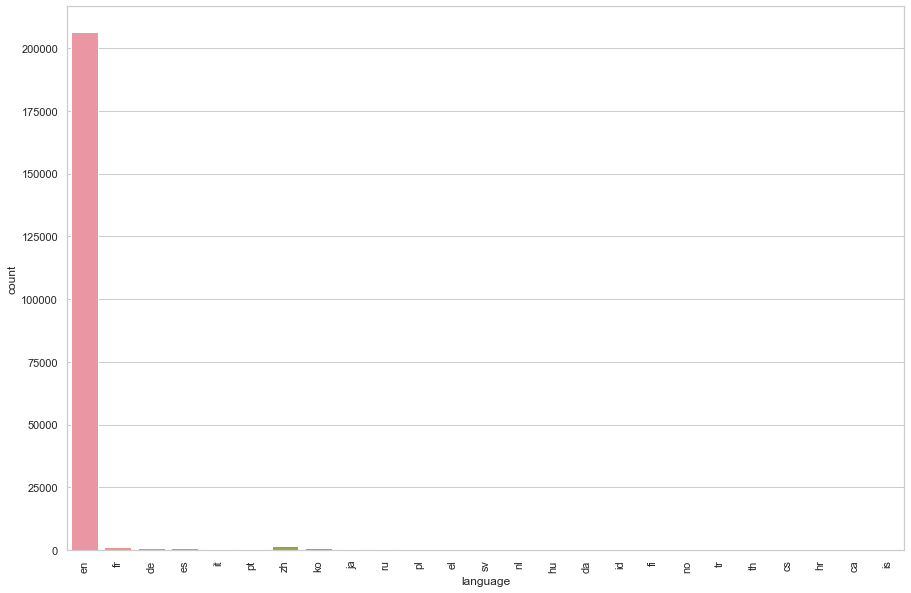

In [22]:
countplot('language')

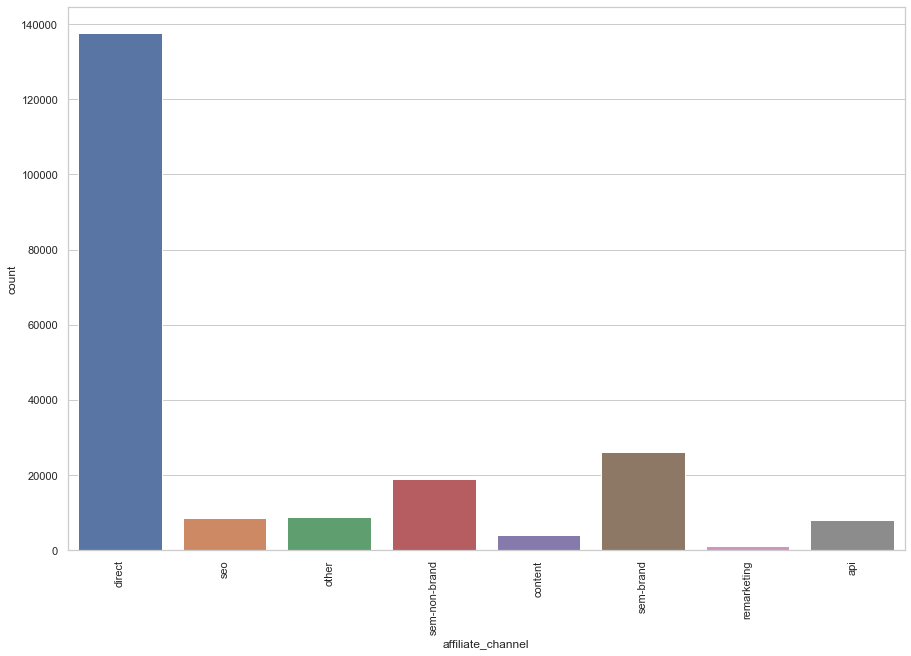

In [23]:
countplot('affiliate_channel')

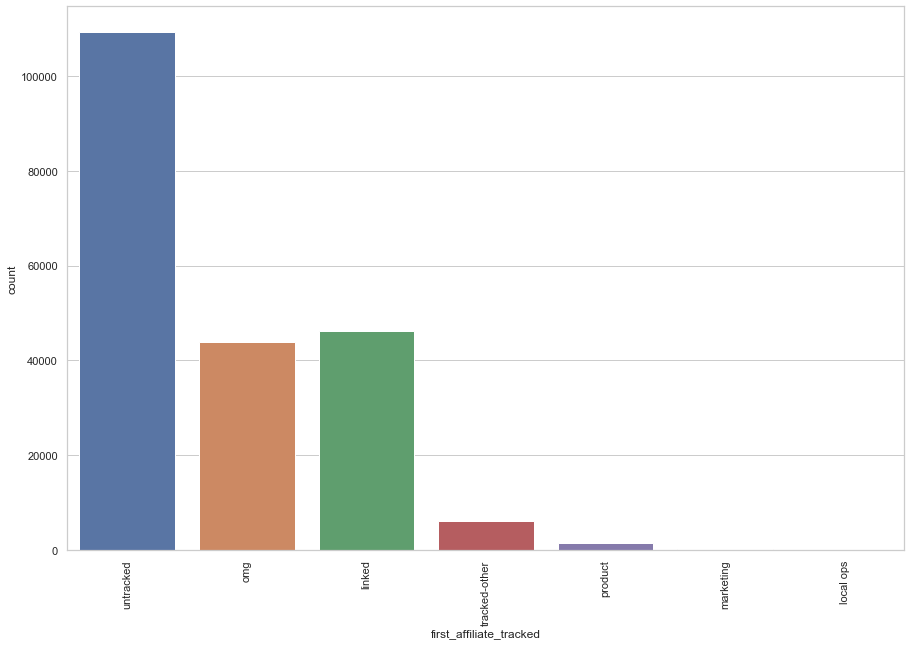

In [24]:
countplot('first_affiliate_tracked')

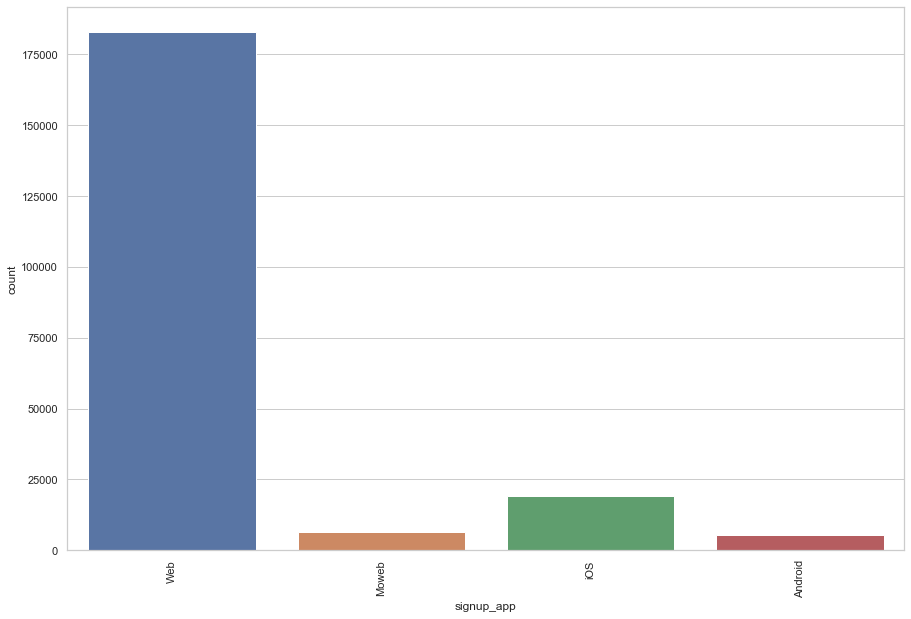

In [25]:
countplot('signup_app')

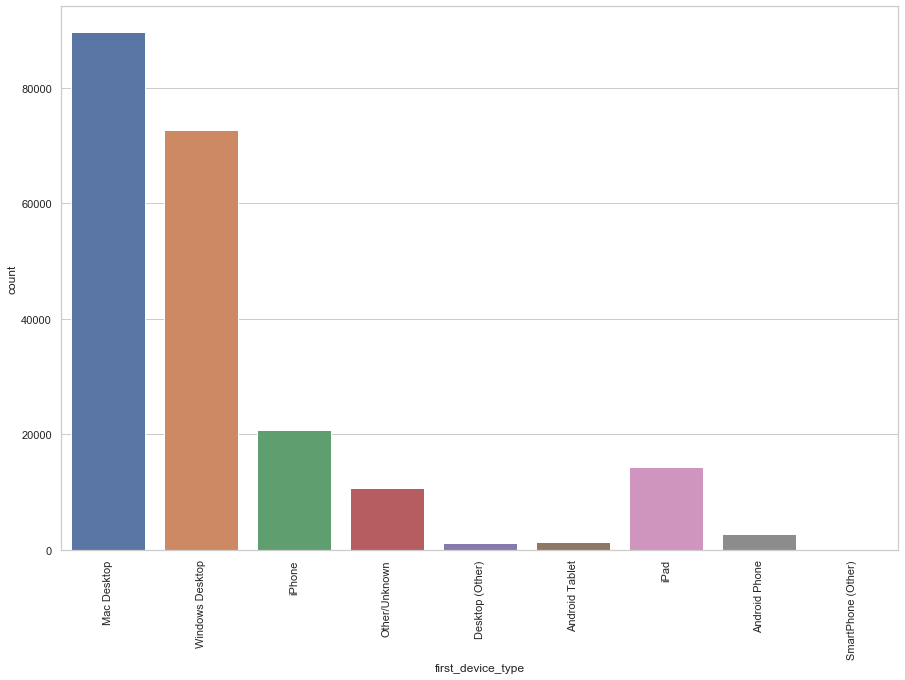

In [26]:
countplot('first_device_type')

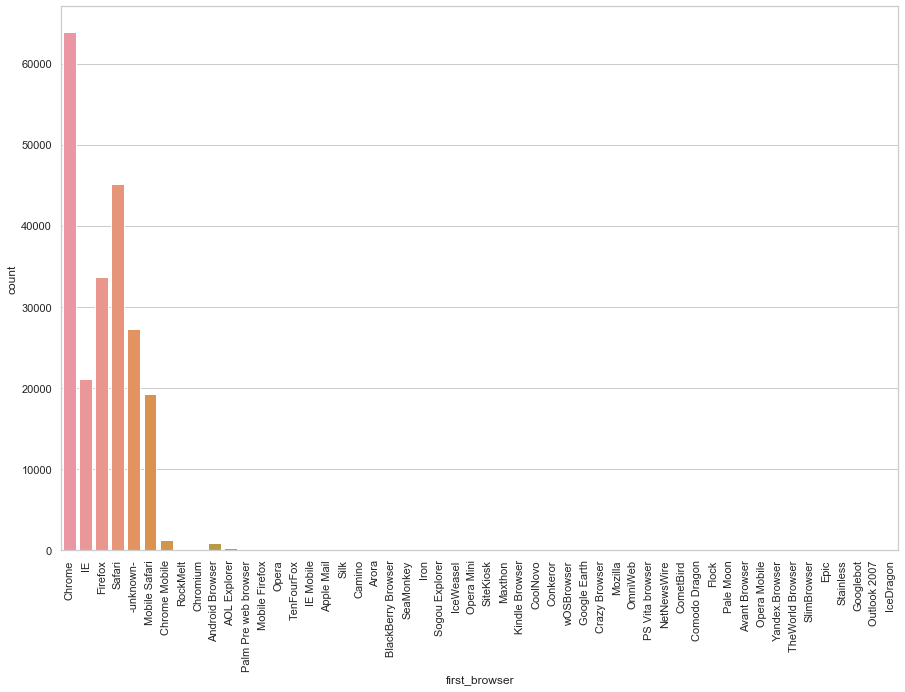

In [27]:
countplot('first_browser')